# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

#### Load the dataset

In [ ]:

df = pd.read_csv("data/Climate_Change_Indicators.csv") # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [8]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [11]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
df_agg = df.groupby("Year")[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]].mean().reset_index()


## 2. Univariate Analysis

Analyze each climate variable independently.

In [6]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

#### Univariate Analysisfor Global Temperature Trend as per Years

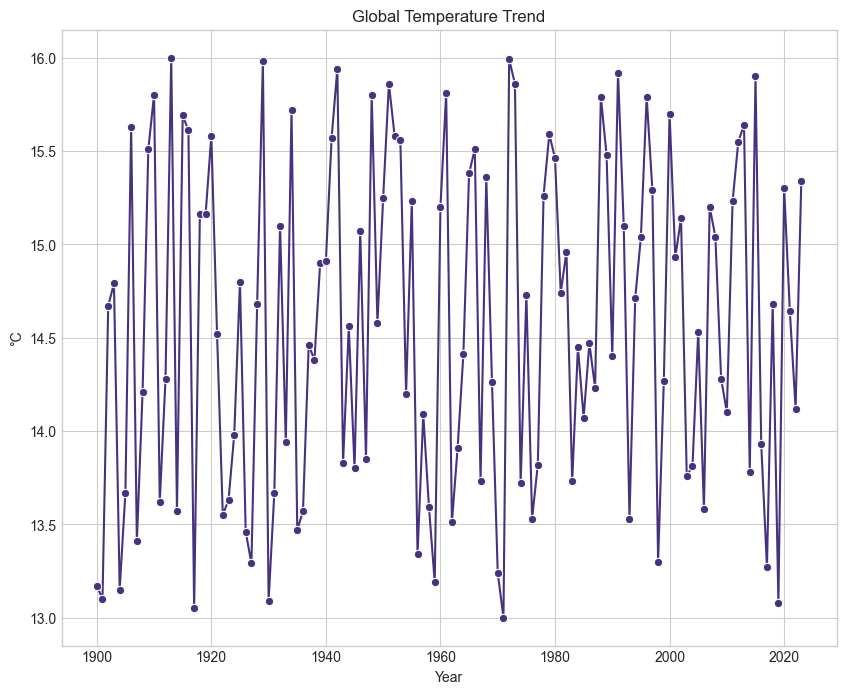

count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64

In [12]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_agg["Year"], y = df["Global Average Temperature (°C)"], marker = "o")
plt.xlabel("Year")
plt.ylabel("°C")
plt.title("Global Temperature Trend")
plt.show()

# Descriptive Statistics
df_agg["Global Average Temperature (°C)"].describe()

#### Univariate Analysis for  "CO2 Concentration (ppm)

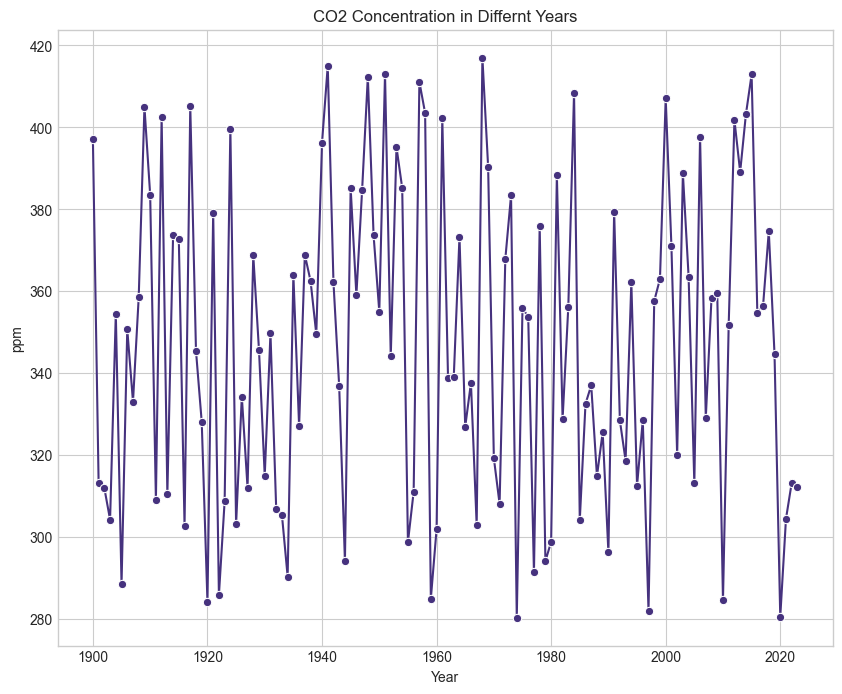

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64

In [13]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_agg["Year"], y = df["CO2 Concentration (ppm)"], marker = "o")
plt.xlabel("Year")
plt.ylabel("ppm")
plt.title("CO2 Concentration in Differnt Years")
plt.show()

# Descriptive Statistics
df_agg["CO2 Concentration (ppm)"].describe()

#### Univariate Analysis for Sea Level Rise (mm)

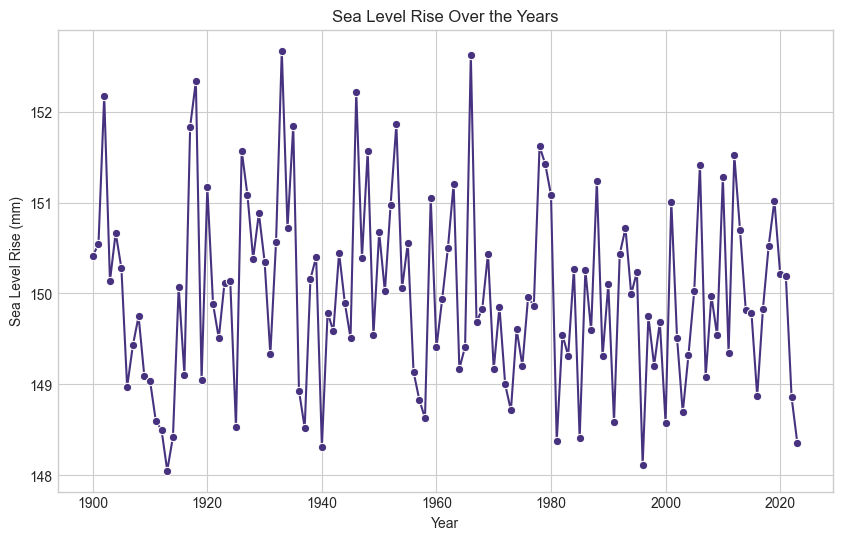

count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_agg["Year"], y=df_agg["Sea Level Rise (mm)"], marker="o")
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (mm)")
plt.title("Sea Level Rise Over the Years")
plt.grid(True)  
plt.show()

# Descriptive Statistics
df_agg["Sea Level Rise (mm)"].describe()


#### Univariate Analysis for Arctic Ice Area (million km²)

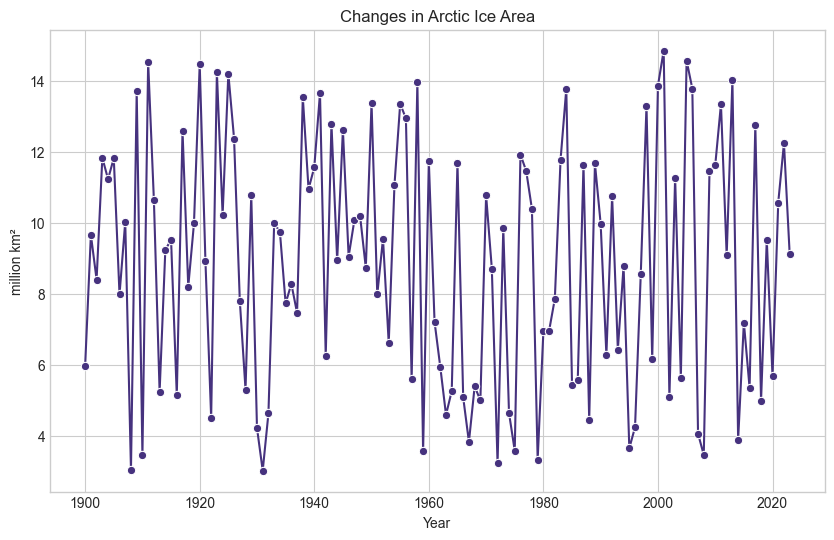

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_agg["Year"], y=df["Arctic Ice Area (million km²)"], marker="o")
plt.xlabel("Year")
plt.ylabel("million km²")
plt.title("Changes in Arctic Ice Area")
plt.grid(True) 
plt.show()

# Descriptive Statistics
df_agg["Arctic Ice Area (million km²)"].describe()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [11]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

#### Relation between CO2 Concentration  and  Global Average Temperature

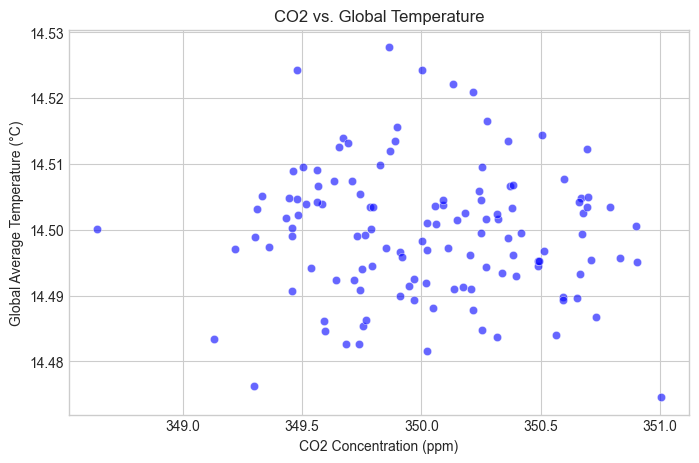

Correlation between CO2 and Global Temperature: -0.07


In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_agg["CO2 Concentration (ppm)"], y=df_agg["Global Average Temperature (°C)"], color="blue", alpha=0.6)
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel("Global Average Temperature (°C)")
plt.title("CO2 vs. Global Temperature")
plt.grid(True)
plt.show()   

# Display the correlation between two specific variables
correlation = df_agg["CO2 Concentration (ppm)"].corr(df_agg["Global Average Temperature (°C)"])
print(f"Correlation between CO2 and Global Temperature: {correlation:.2f}")

#### Relation between  Sea Level Rise (mm) and  Arctic Ice Area (million km²)

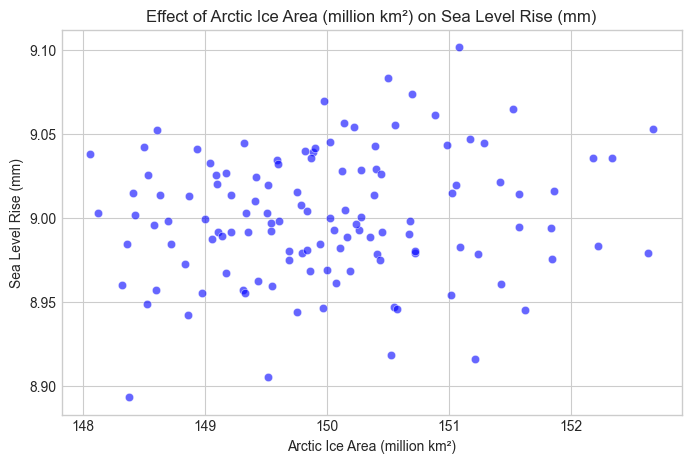

Correlation between Arctic Ice area and Sea Level Rise: 0.13


In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_agg["Sea Level Rise (mm)"], y=df_agg["Arctic Ice Area (million km²)"], color="blue", alpha=0.6)
plt.xlabel("Arctic Ice Area (million km²)")
plt.ylabel("Sea Level Rise (mm)")
plt.title("Effect of Arctic Ice Area (million km²) on Sea Level Rise (mm)")
plt.grid(True)
plt.show()   

# Display the correlation between two specific variables
correlation = df_agg["Arctic Ice Area (million km²)"].corr(df_agg["Sea Level Rise (mm)"])
print(f"Correlation between Arctic Ice area and Sea Level Rise: {correlation:.2f}")

#### Change in variables in relation to each other over time

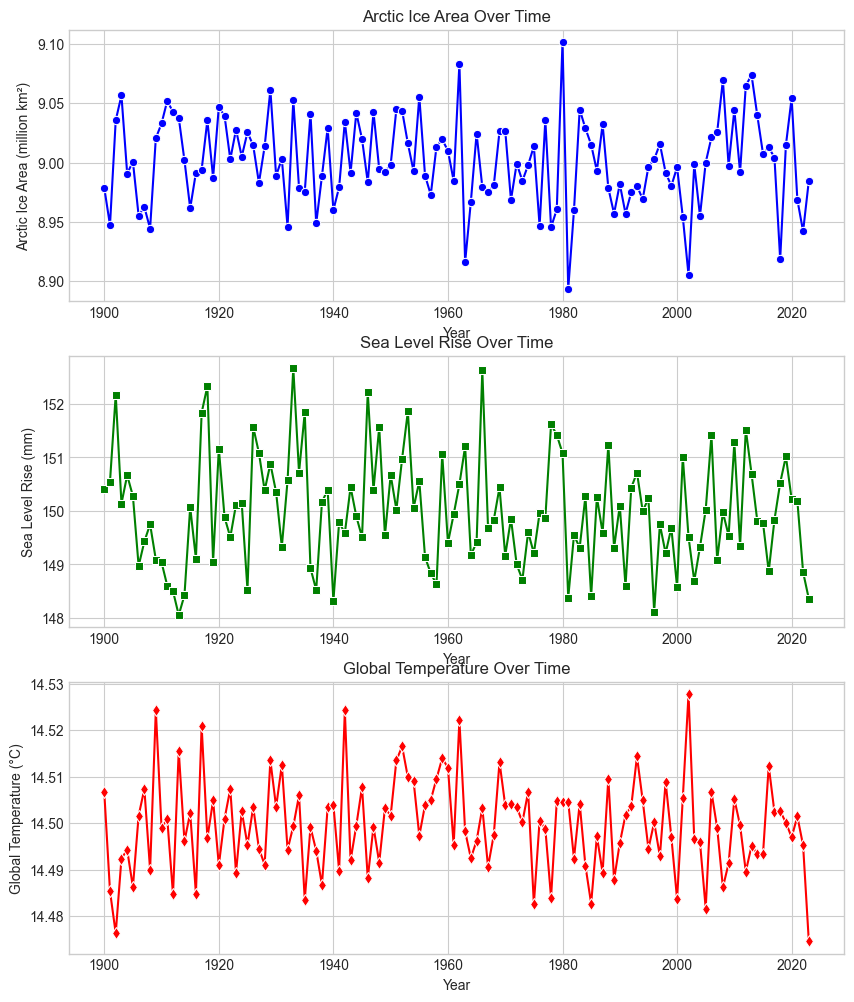

In [18]:
# Arctic Ice Area over time
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
sns.lineplot(x=df_agg["Year"], y=df_agg["Arctic Ice Area (million km²)"], ax=ax[0], marker="o", color="blue")
ax[0].set_ylabel("Arctic Ice Area (million km²)")
ax[0].set_title("Arctic Ice Area Over Time")
ax[0].grid(True)

# Sea Level Rise over time
sns.lineplot(x=df_agg["Year"], y=df_agg["Sea Level Rise (mm)"], ax=ax[1], marker="s", color="green")
ax[1].set_ylabel("Sea Level Rise (mm)")
ax[1].set_title("Sea Level Rise Over Time")
ax[1].grid(True)

# Global Average Temperature over time
sns.lineplot(x=df_agg["Year"], y=df_agg["Global Average Temperature (°C)"], ax=ax[2], marker="d", color="red")
ax[2].set_ylabel("Global Temperature (°C)")
ax[2].set_title("Global Temperature Over Time")
ax[2].grid(True)

plt.xlabel("Year")
plt.show()

#### Correlation heatmap for given Variables

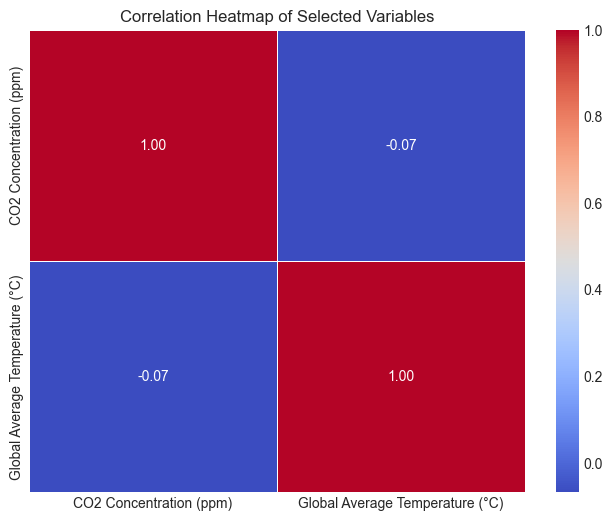

In [34]:

# Select the relevant columns for correlation
selected_columns = ["CO2 Concentration (ppm)", "Global Average Temperature (°C)"]

# Compute the correlation matrix for the selected columns
correlation_matrix = df_agg[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [16]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

C:\Users\youg_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


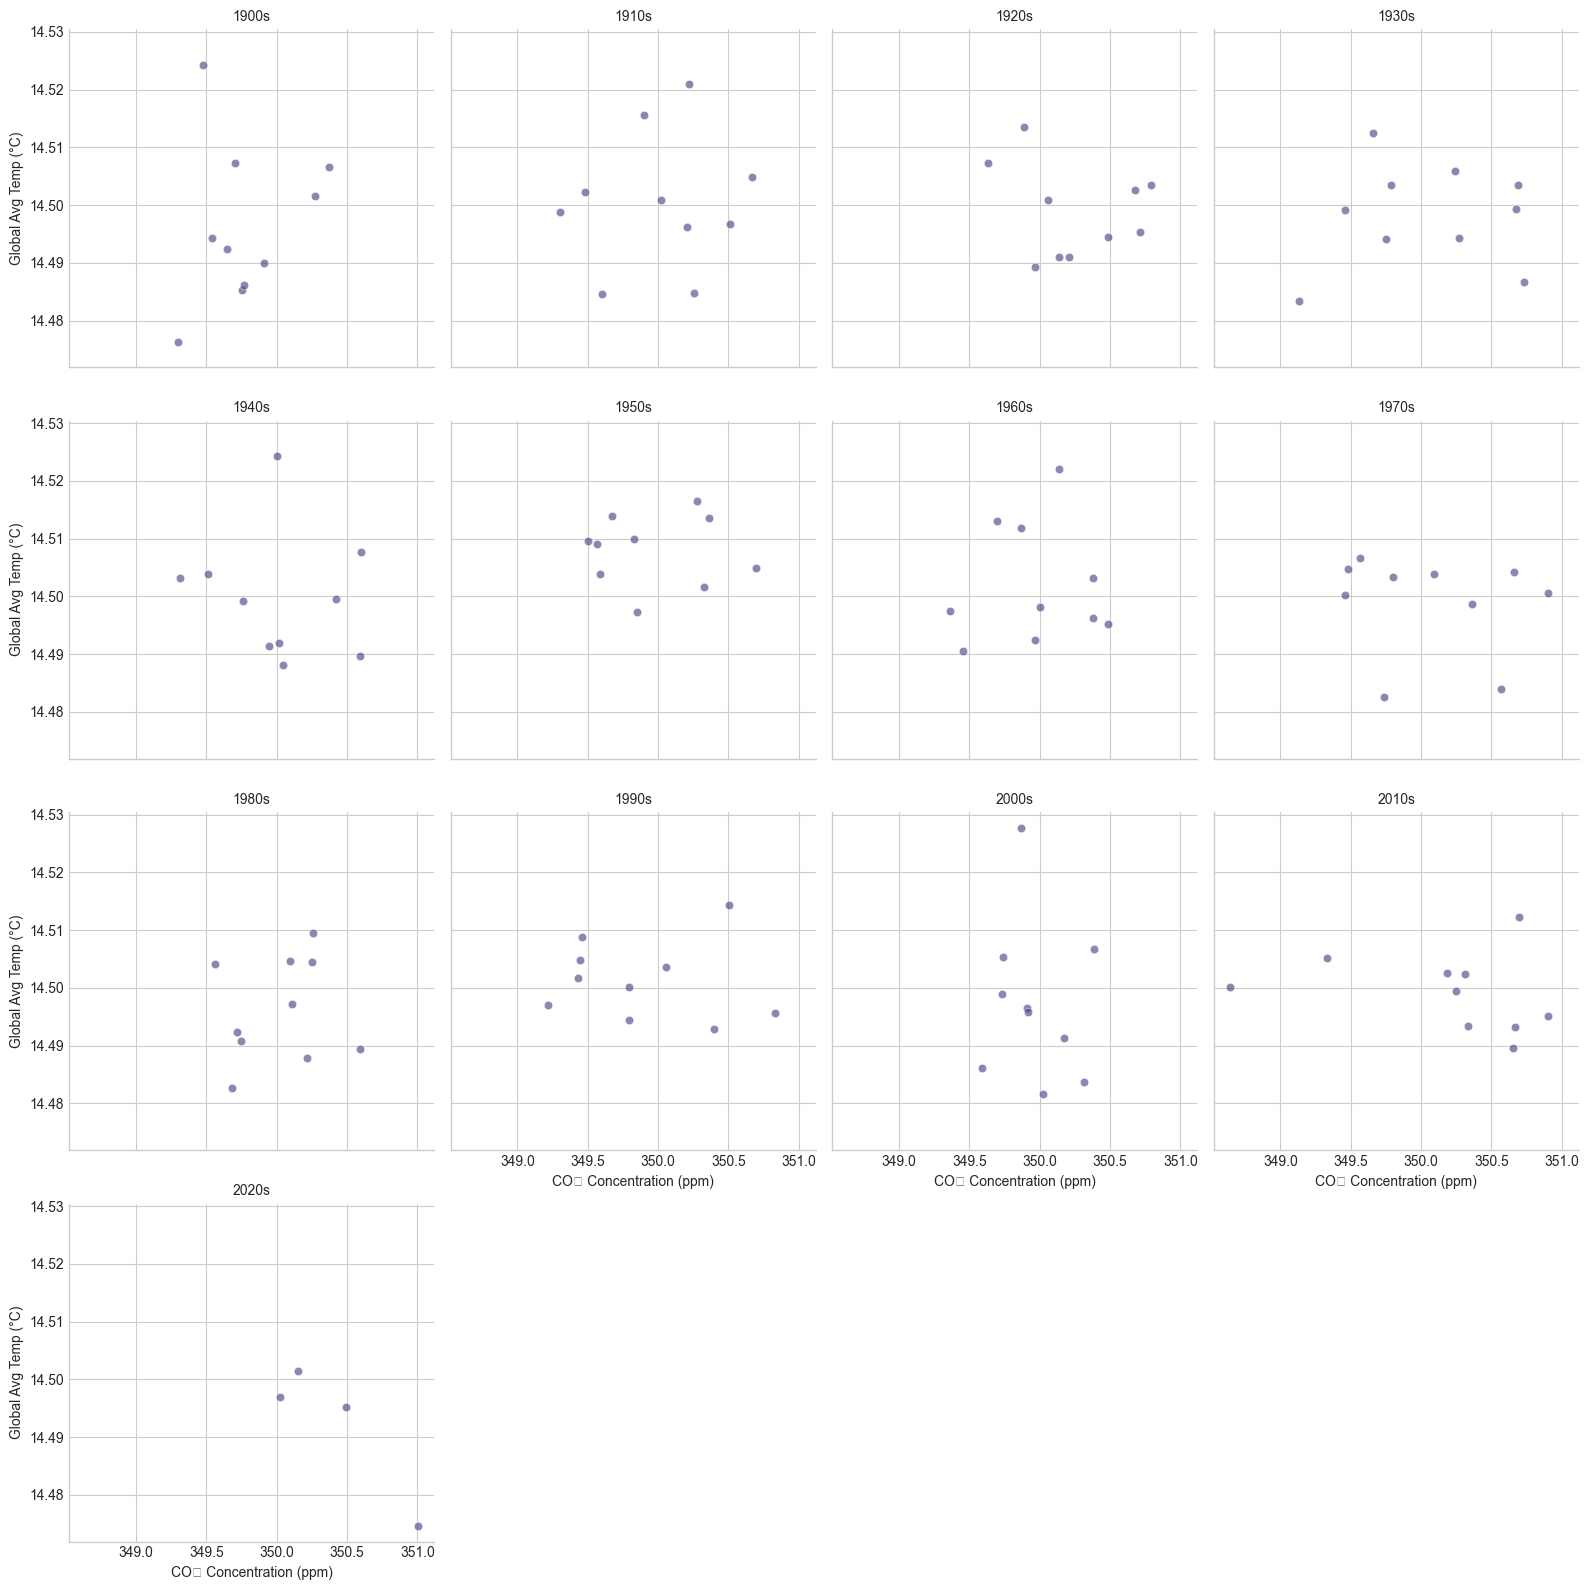

In [35]:
df_agg["Decade"] = (df_agg["Year"] // 10) * 10  # Create a "Decade" column

g = sns.FacetGrid(df_agg, col="Decade", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="CO2 Concentration (ppm)", y="Global Average Temperature (°C)", alpha=0.6)
g.set_axis_labels("CO₂ Concentration (ppm)", "Global Avg Temp (°C)")
g.set_titles(col_template="{col_name}s")
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
1. CO2 concentration is rising rapidly over the years.
2. There is positive Correlation in CO2 emission and global temperature.
3. Increase in global temperature has given rise to decrease of Arctic Ice cover which is reflected in rise in sea level.